## Pokemon - Exploratory Data Analysis (EDA)

In [24]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.manifold import TSNE
from sklearn.cluster import k_means

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

!jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Loading the data

In [25]:
df = pd.read_csv('data/pokemon.csv')
df.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [26]:
# fetching the column-names
header = df.columns
header

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Descriptive Statistics

In [27]:
## uncomment code for distributions of individual features
# for i in header:
#     sns.displot(df, x=i)

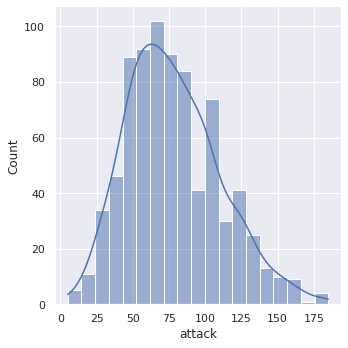

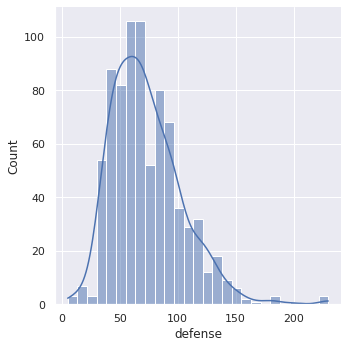

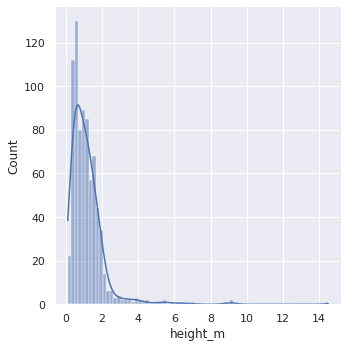

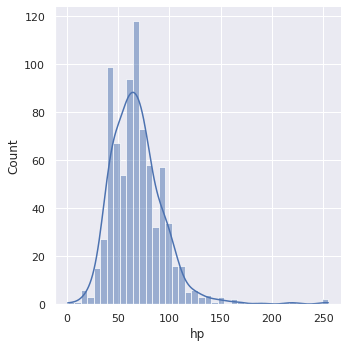

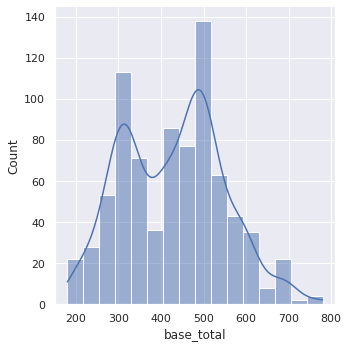

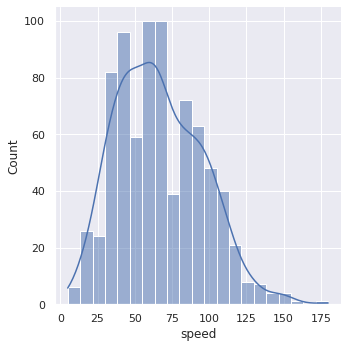

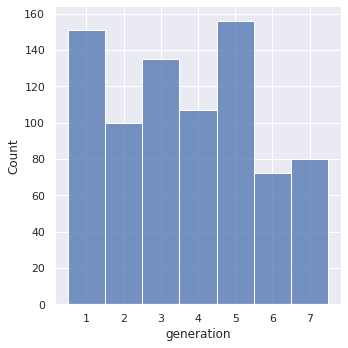

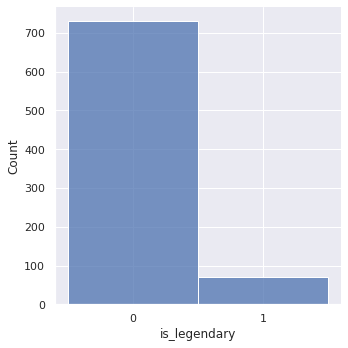

In [28]:
# interesting features and their distributions
col = ["attack", "defense", "height_m", "hp", "base_total", "speed", "generation", "is_legendary"]
dg = df[col]
for i in col:
    if i in ['generation', 'is_legendary']:
        if i == 'is_legendary':
            sns.displot(df, x=i, discrete=True).ax.set_xticks([0, 1])
            continue
        sns.displot(df, x=i, discrete=True)
        continue
    sns.displot(df, x=i, kde=True)

In [29]:
print(f"{format(len(df[df['is_legendary'] == 1]) / len(df) * 100, '0.2f')}% of pokemons are legendary")

8.74% of pokemons are legendary


df[feature].mean()=428.3770287141074
df[feature].median()=435.0
df[feature].std()=119.20357658921323


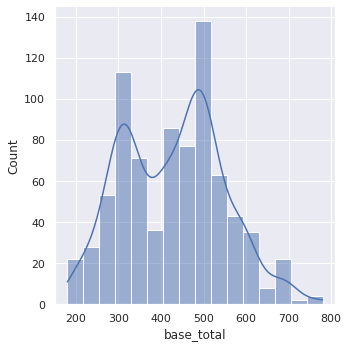

In [30]:
feature = 'base_total'
print(f'{df[feature].mean()=}')
print(f'{df[feature].median()=}')
print(f'{df[feature].std()=}')
sns.displot(df, x=feature, kde=True)

### Insights:

- base_total follows a bimodal distribution

___

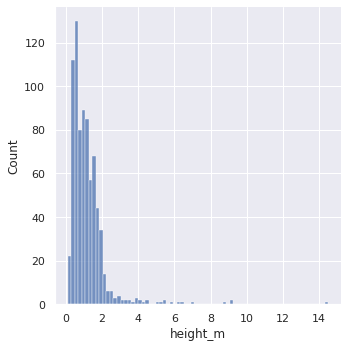

In [31]:
sns.displot(data=df, x='height_m')

<AxesSubplot:xlabel='height_m'>

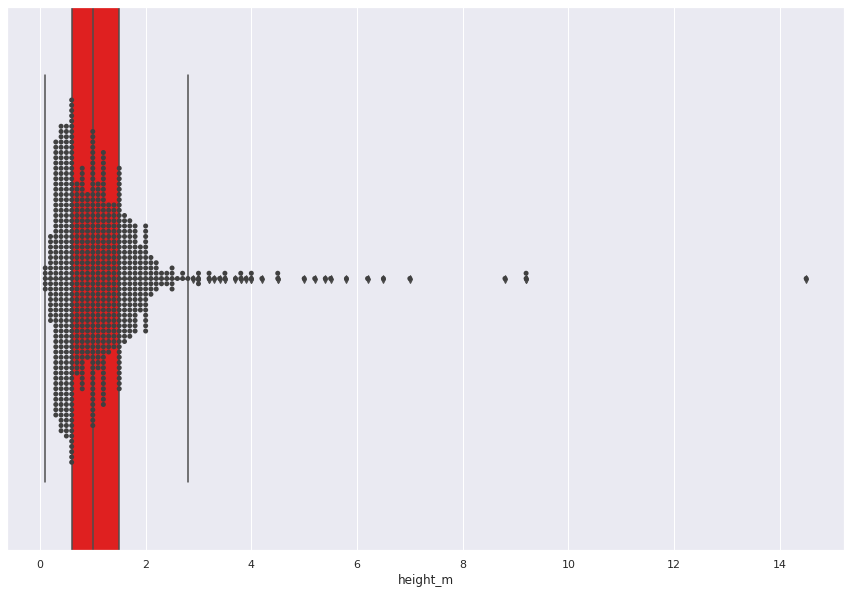

In [32]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.boxplot(data=df, x='height_m', color='red', width=1.5)
sns.swarmplot(data=df, x='height_m', color='.25')

### Insights:

- Height follows a right/positive skewed distribution with some extreme outliers.

___

## Correlations between attributes

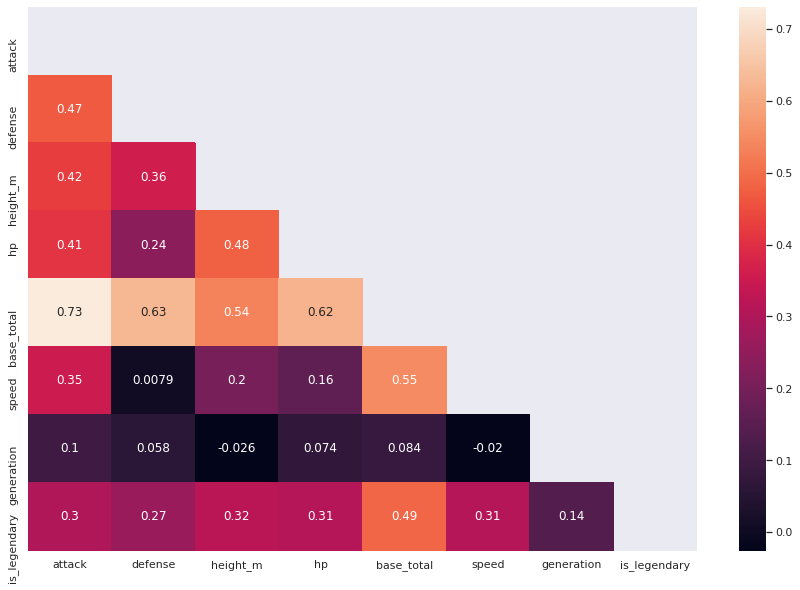

In [33]:
sns.set(rc = {'figure.figsize':(15,10)})
mask = np.zeros_like(df[col].corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df[col].corr(), annot=True, mask=mask)

### Insights:

- Base_total is a measure of overall quality of a pokemon. Attack, defense and hp (hit points) correlate highly with the base_total, so we can see that these are important properties in the game.
- Interestingly, the speed of a pokemon does not correlate with its defense score.
- Generation also does not influence the stats of the pokemons, which indicates that the developers were not trying to sell new generations with better pokemons.

___

Text(0.5, 0.98, 'Grass Pokemon')

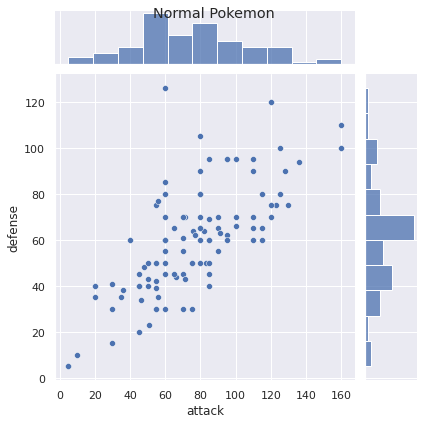

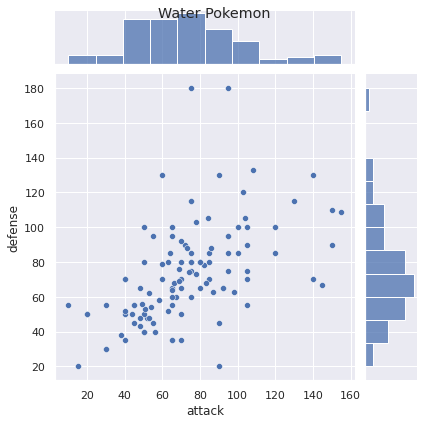

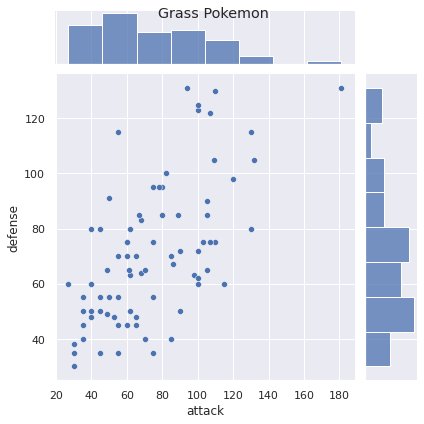

In [34]:
sns.set()

sns.jointplot(data=df[df['type1']=='normal'], x='attack', y='defense', kind='scatter').fig.suptitle('Normal Pokemon')
sns.jointplot(data=df[df['type1']=='water'], x='attack', y='defense', kind='scatter').fig.suptitle('Water Pokemon')
sns.jointplot(data=df[df['type1']=='grass'], x='attack', y='defense', kind='scatter').fig.suptitle('Grass Pokemon')

### Insights:

- Compared to normal pokemon, grass pokemon are more present in the lower range of attack points.
- Both, water and grass pokemons are pokemon which also have low defense compared to normal pokemons.
- However, all pokemons of these types share a positive correlation (attack/defense).

___

,sp_defense,defense
sp_defense,1.000000,0.526348
defense,0.526348,1.000000


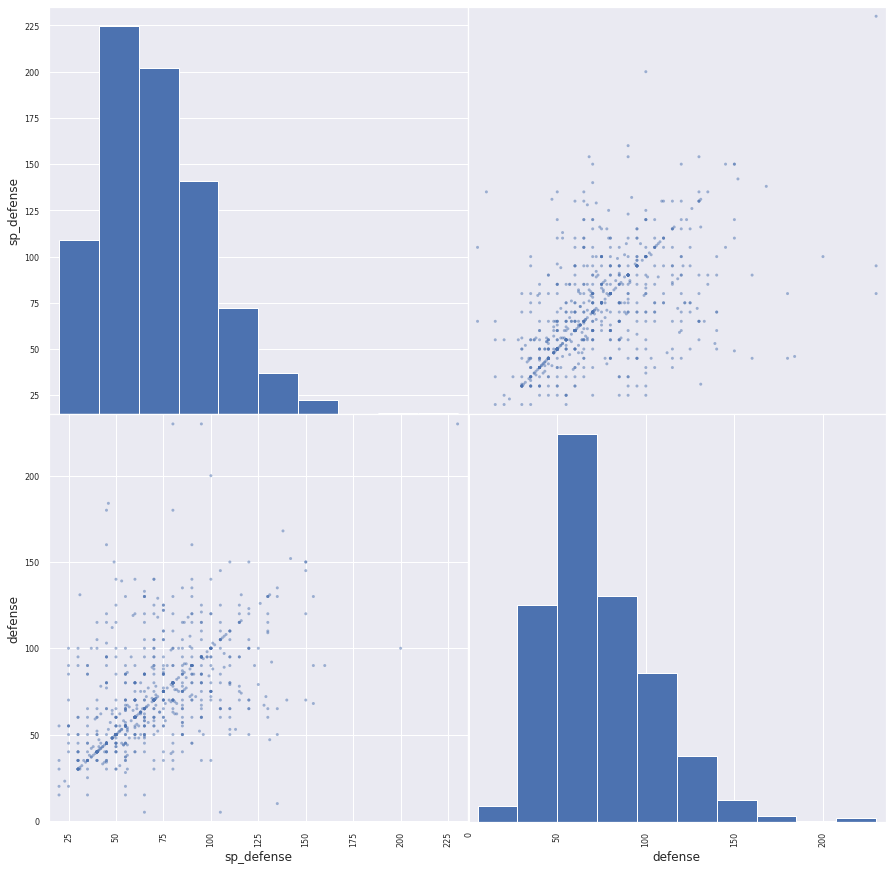

In [35]:
scatter_matrix(df[['sp_defense','defense']],figsize=(15,15))
df[['sp_defense','defense']].corr()

,sp_attack,attack
sp_attack,1.000000,0.368154
attack,0.368154,1.000000


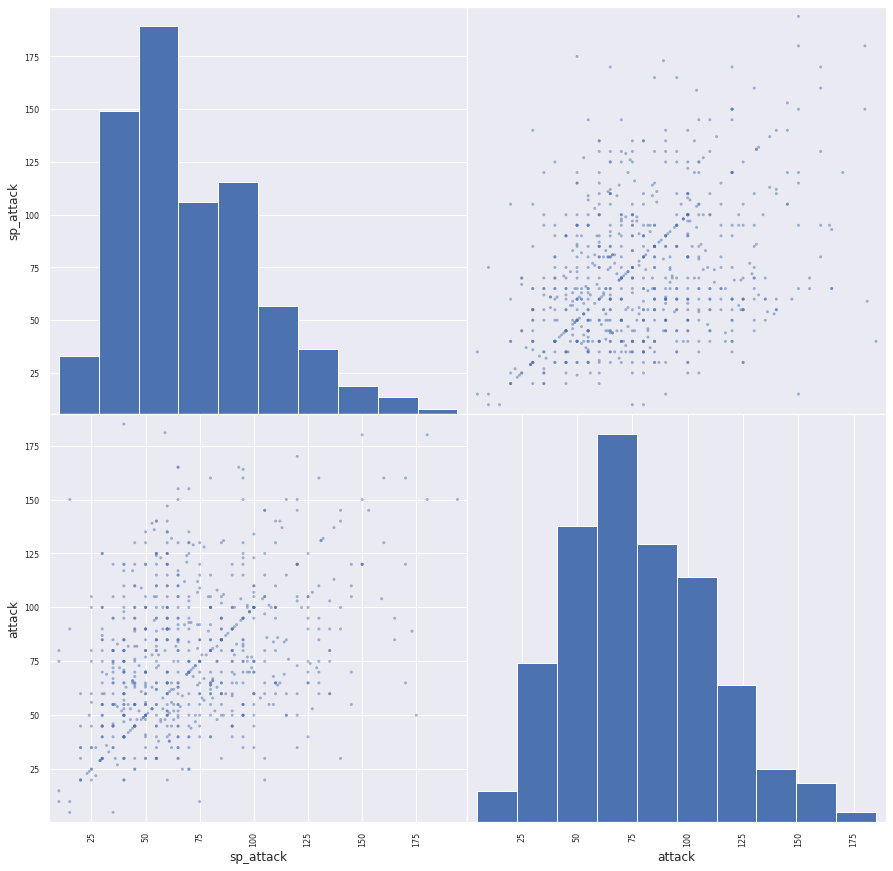

In [36]:
scatter_matrix(df[['sp_attack','attack']],figsize=(15,15))
df[['sp_attack','attack']].corr()

### Insights:

- We can easily see that defense and special-defense are highly correlated.
- Similar for attack and special attack.

___

## Clustering

In [37]:
base_chart = alt.Chart(df).mark_point(filled=True, size=100, opacity=0.6).encode(
    x='attack:Q',
    y='defense:Q',
    color='is_legendary:N'
).interactive()
base_chart

alt.Chart(...)

### Insights:

- The first clustering plot shows that legendary pokemon have on average better attack and defense scores. 

___

In [38]:
## creating new feature set
new_col = []
for i in col:
    if df[i].isnull().any() or i == 'generation' or i == 'is_legendary':
        continue
    new_col.append(i)
new_col

['attack', 'defense', 'hp', 'base_total', 'speed']

Text(0.5, 1.0, 'K-Means Clustering')

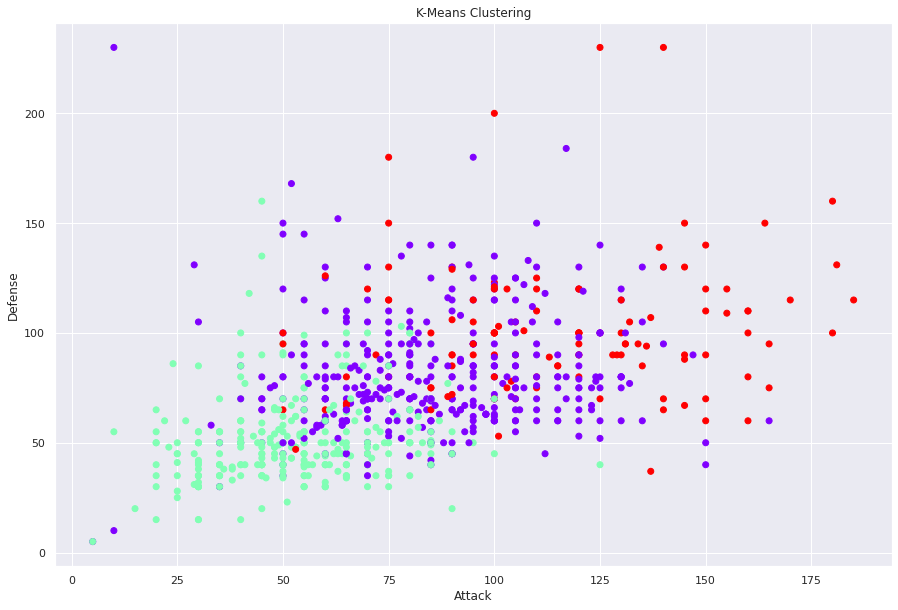

In [39]:
cluster = k_means(np.array(df['base_total']).reshape(-1, 1), 3)

plt.scatter(df['attack'], df['defense'], c=cluster[1], cmap='rainbow')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('K-Means Clustering')

### Insights:

- The k-means clustering algorithm can quite nicely separate pokemon into three groups. Although there is overlap.

___

In [40]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df[new_col])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.001s...
[t-SNE] Computed neighbors for 801 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 14.089167
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.628311
[t-SNE] KL divergence after 1000 iterations: 0.667792


[Text(0.5, 1.0, 'Pokemon (non-)legendary T-SNE projection')]

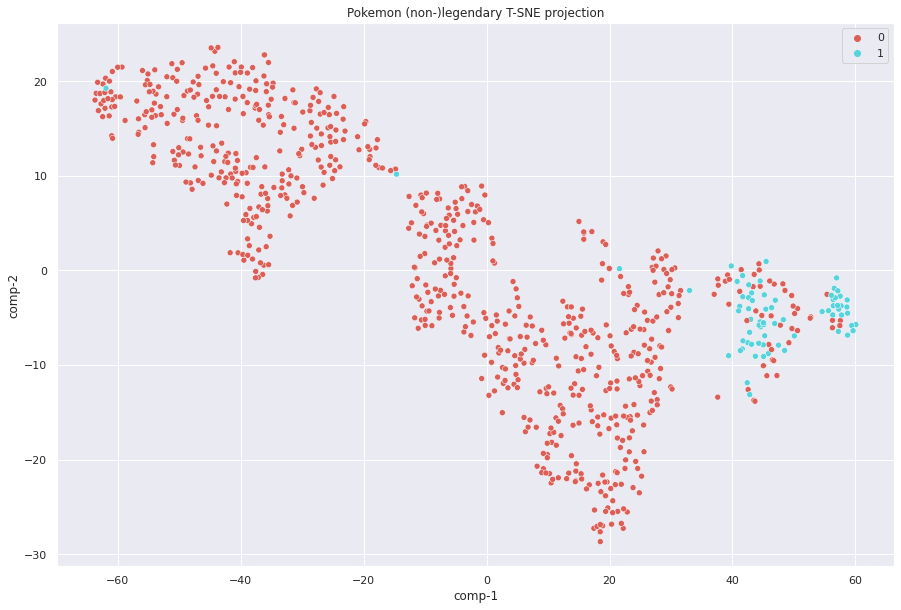

In [41]:
feature_tsne = 'is_legendary'

len_feat = len(df[feature_tsne].unique())

df["cluster"] = df[feature_tsne]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.cluster.tolist(),
                palette=sns.color_palette("hls", len_feat),
                data=df).set(title="Pokemon (non-)legendary T-SNE projection")

### Insights:

- After downprojecting the data with the following properties ['attack', 'defense', 'hp', 'base_total', 'speed'] and coloring the datapoints by the attribute 'is_legendary' we can indeed see, that legendary pokemons are quite good distinguishable from the rest of the pokemons.

___

In [42]:
## creating new feature set with 'against ...' properties only
against_col = []
for i in header:
    if 'against' not in i:
        continue
    against_col.append(i)
against_col

['against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water']

In [43]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(df[against_col])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.000s...
[t-SNE] Computed neighbors for 801 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.368561
[t-SNE] KL divergence after 1000 iterations: 0.350358


[Text(0.5, 1.0, 'Pokemon Type T-SNE projection')]

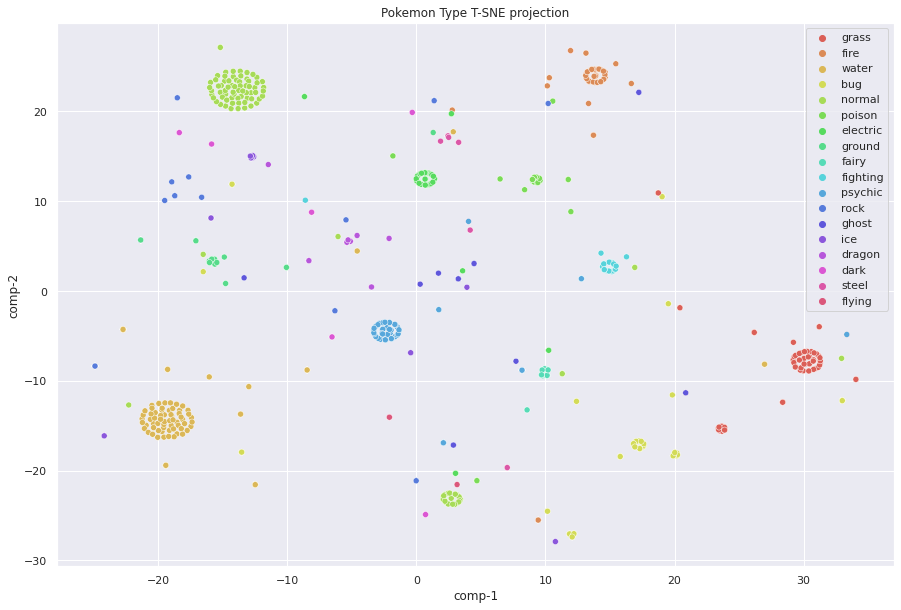

In [44]:
feature_tsne = 'type1'

len_feat = len(df[feature_tsne].unique())

df["cluster"] = df[feature_tsne]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.cluster.tolist(),
                palette=sns.color_palette("hls", len_feat),
                data=df).set(title="Pokemon Type T-SNE projection")

### Insights:

- In this step we downprojected the effectiveness of pokemon against different types of pokemon and indeed the clusters form according to their own types.

___

In [45]:
base_chart = alt.Chart(df).mark_point(filled=True, size=100, opacity=0.6).encode(
    x='comp-1:Q',
    y='comp-2:Q',
    color='cluster:N'
).interactive()

@widgets.interact(perplexity = np.linspace(1, 100, num=100, dtype=int), learning = np.linspace(10, 10000, num=1000, dtype=int))
def show_plot(perplexity, learning):
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, learning_rate=learning, random_state=42)
    z = tsne.fit_transform(df[against_col])
    
    df["cluster"] = df[feature_tsne]
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]
    
    # You have to return the chart to make it visible.
    return base_chart.encode(
    x='comp-1:Q',
    y='comp-2:Q',
)

interactive(children=(Dropdown(description='perplexity', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

### Description:

- Here you can play yourself with the data. You can adjust perplexity and learning rate of a TSNE-Clustering algorithm.
- The colors represent the different types of pokemon.

___

In [46]:
select = alt.selection(type='interval')
values = alt.Chart(df).mark_point(filled=True).encode(
    x='attack:Q',
    y='defense:Q',
    color=alt.condition(select, 'type1:N', alt.value('lightgray'))
).add_selection(
    select
)
bars = alt.Chart(df).mark_bar().encode(
    y='type1:N',
    color='type1:N',
    x='count(type1):Q'
).transform_filter(
    select
)
values & bars

alt.VConcatChart(...)

### Description:

- In this plot you can choose your own intervall with the mouse.
- The bars below show the ditribution of the different types in the chosen interval.
- Can you spot any significant differences of the types?